# Ejercicio 1

## a.

En primer lugar necesitamos importar las dependencias necesarias, las cuales son

In [56]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from src.images import get_image, offset_image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

Inicializamos la clases factory la cual se utilizara para crear a cada pokemon e inicializar el array pokeballs que contendra el nombre de cada pokebola, como tambien instanciar las clases y crear los datos.

In [57]:
factory = PokemonFactory("pokemon.json")
POKEBALLS = ["pokeball", "ultraball", "fastball", "heavyball"]  
HP = 1
LEVEL = 100
COLORS = ['red', 'grey', 'yellow', 'blue']

with open("pokemon.json", "r") as c:
    pokemon_db = json.load(c)
        
pokemons = [factory.create(pokemon, LEVEL, StatusEffect.NONE, HP) for pokemon in pokemon_db]        

En el siguiente codigo se realiza, con todas las pokebolas,  100 intentos de atrapar a cada pokemon y finalmente se muestra el grafico de los porcentajes de atrapadas en funcion del tipo de pokebola.

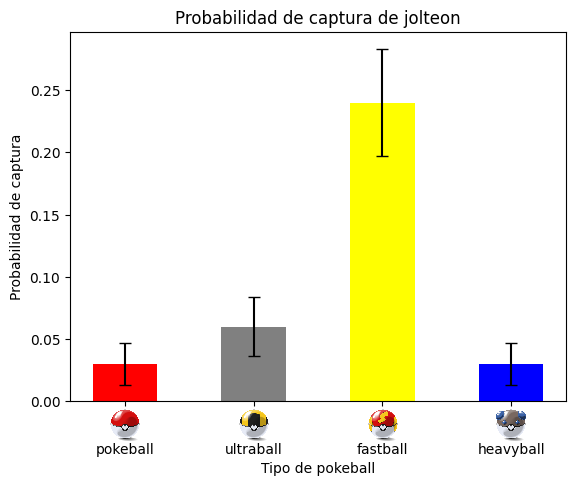

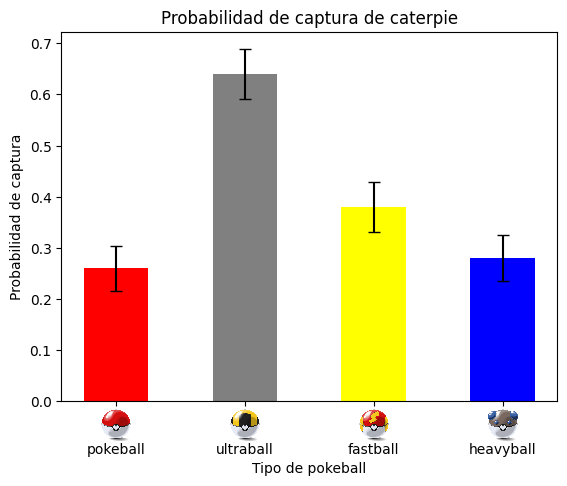

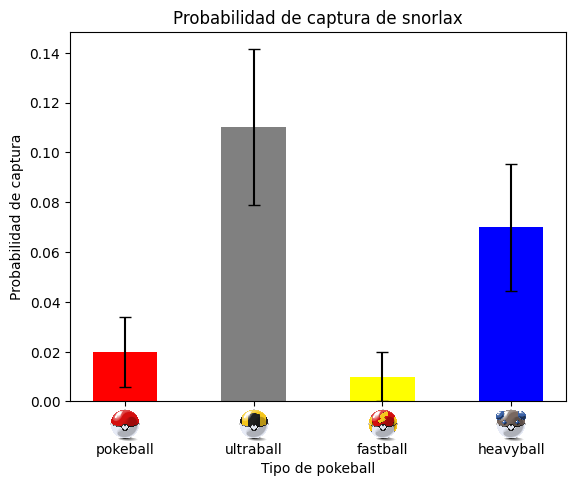

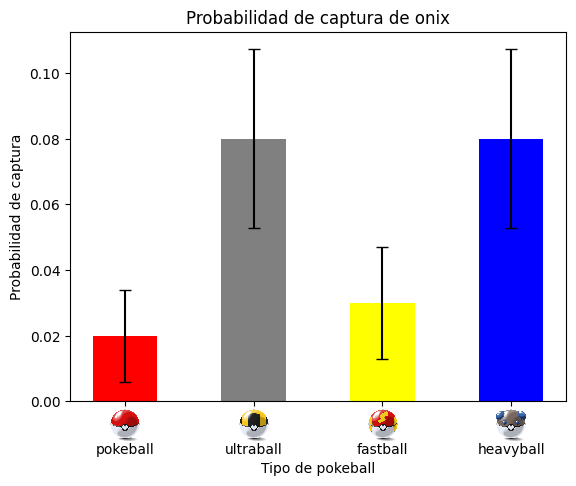

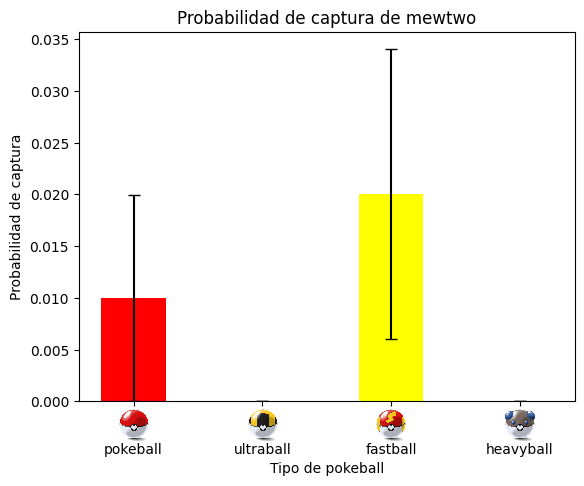

In [58]:
for pokemon in pokemons:
    capture_rates = []
    std_errors = []
    for pokeball in POKEBALLS:
        capture_attempts = []
        for i in range(100):
            capture_attempts.append(attempt_catch(pokemon, pokeball)[0])

        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        # El cálculo del error estándar se realiza dividiendo la desviación estándar de la
        # muestra por la raíz cuadrada del tamaño de la muestra.
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
        
    fig, ax = plt.subplots()

    ax.bar(range(len(POKEBALLS)), capture_rates, yerr=std_errors, capsize=4, width=0.5, align="center", color=COLORS)
    ax.set_xticks(range(len(POKEBALLS)))
    ax.set_xticklabels(POKEBALLS)
    ax.tick_params(axis='x', which='major', pad=26)
    
    plt.title(f'Probabilidad de captura de {pokemon.name}')
    plt.xlabel('Tipo de pokeball')
    plt.ylabel('Probabilidad de captura')

    for i, c in enumerate(POKEBALLS):
        offset_image(i, c, ax)
        
    plt.show()

## b.

Efectivamente, dadas ciertas propiedades intrinsecas de cada pokemon la propiedad de atraparlos se ve modificada.
Por ejemplo:
- Jolteon tiene 130 en su estadistica de velocidad; por lo que observando el grafico, la probabilidad de atraparlo con la fastball en la mayoria de casos sera razonablemente superior comparado a las otras pokeballs. Esto se debe a que la pokebola fastball incrementa la posibilidad de atrapar a partir de 100 de estadistica.
- De forma analoga, ocurre lo mismo con Snorlax (quien tiene un peso de 1014.1 kg) y la heavyball.